<a href="https://colab.research.google.com/github/swecomic/xray/blob/jy_dev/ipynb/train_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'xray' already exists and is not an empty directory.
loading annotations into memory...
Done (t=16.17s)
creating index...
index created!
2020-08-12 00:24:03.334660 : [ XrayDataloader ] isValid check len : 18658
2020-08-12 00:24:18.515280 : [ XrayDataloader ] Dataset Created
2020-08-12 00:24:18.516331 : [ Train ] get_data_loader: loader make complete, total dataset : 1224


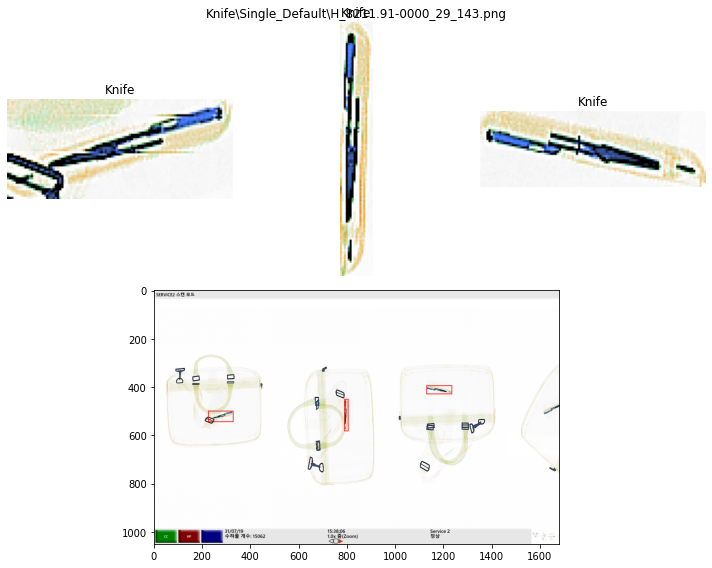

Knife\Single_Default\H_8211.91-0000_29_143.png


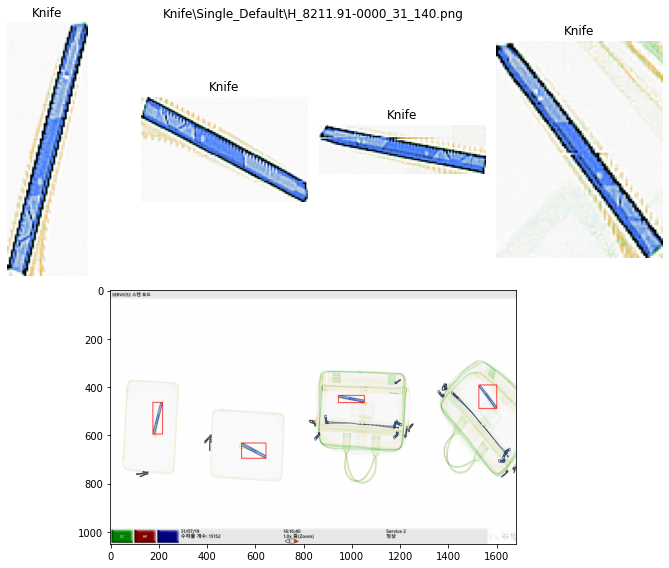

Knife\Single_Default\H_8211.91-0000_31_140.png


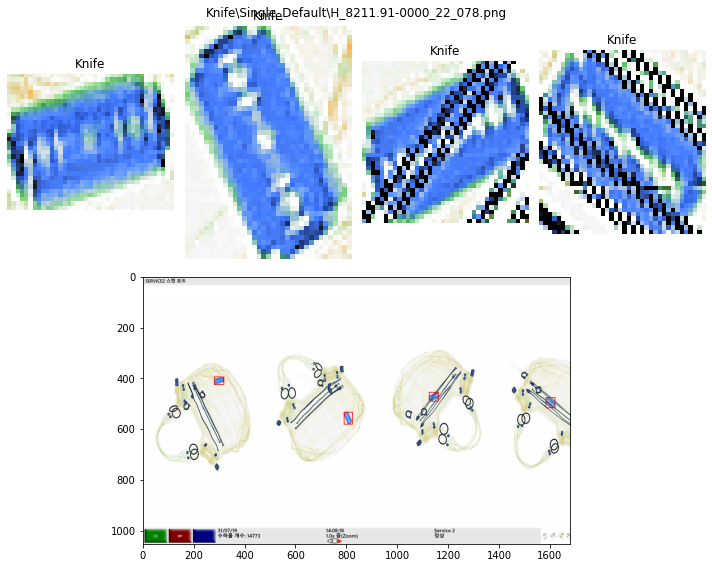

Knife\Single_Default\H_8211.91-0000_22_078.png


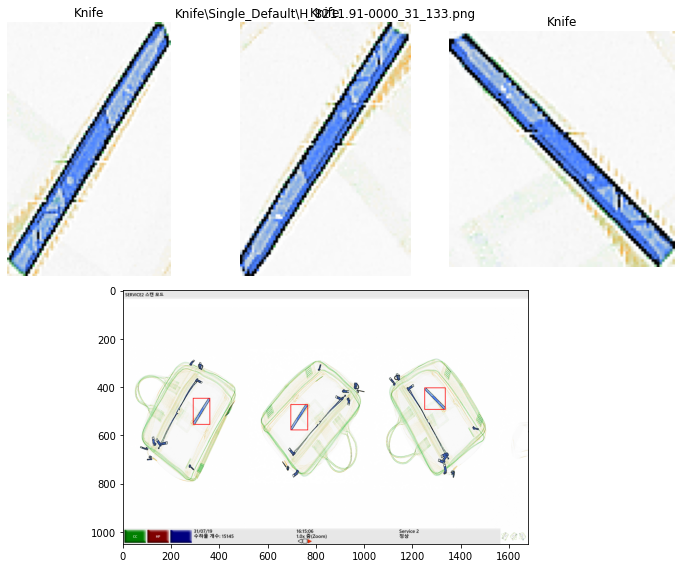

Knife\Single_Default\H_8211.91-0000_31_133.png


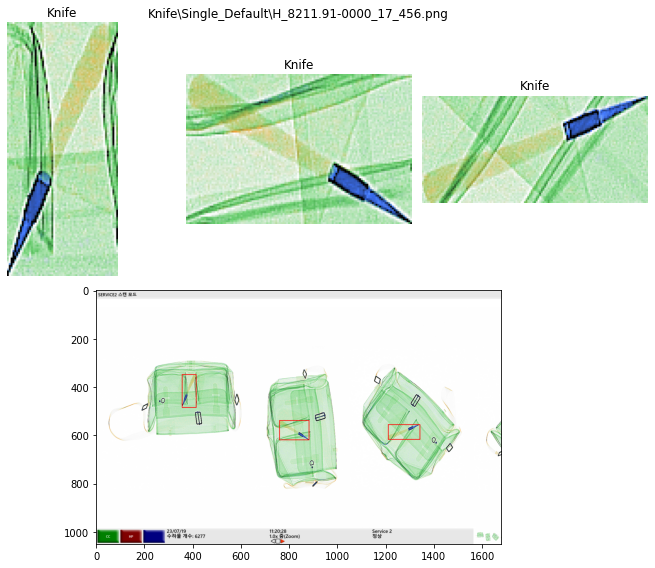

Knife\Single_Default\H_8211.91-0000_17_456.png


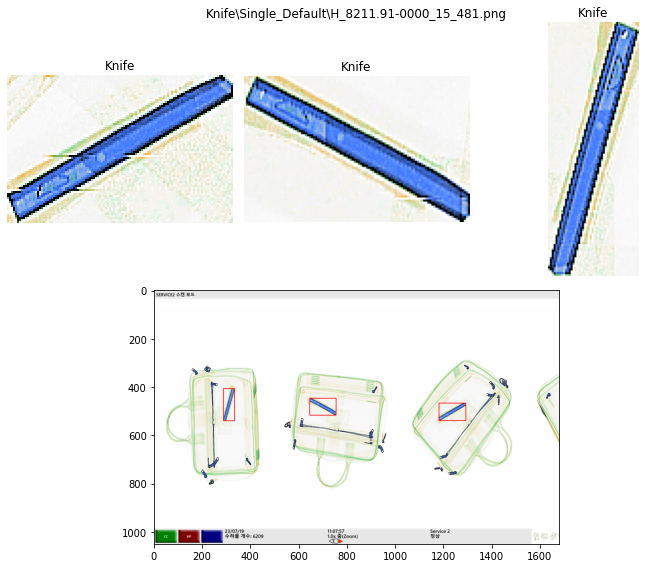

Knife\Single_Default\H_8211.91-0000_15_481.png


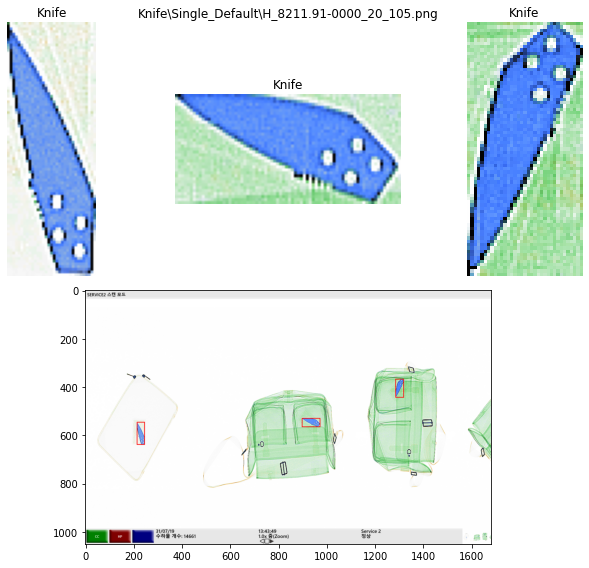

Knife\Single_Default\H_8211.91-0000_20_105.png


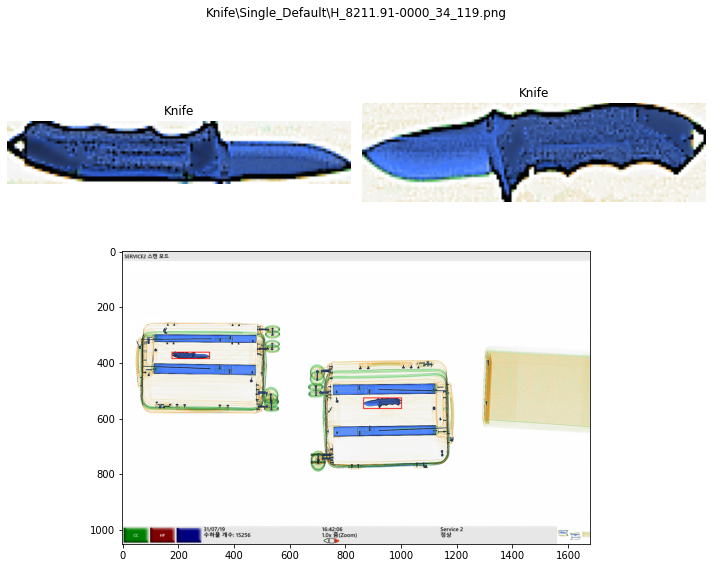

Knife\Single_Default\H_8211.91-0000_34_119.png


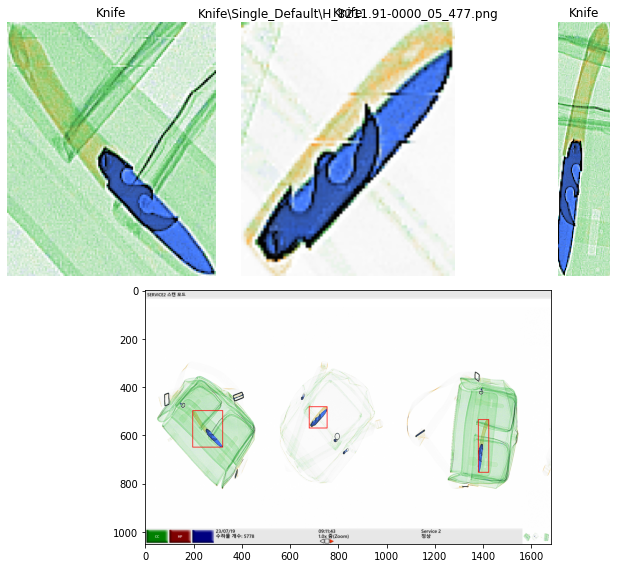

Knife\Single_Default\H_8211.91-0000_05_477.png


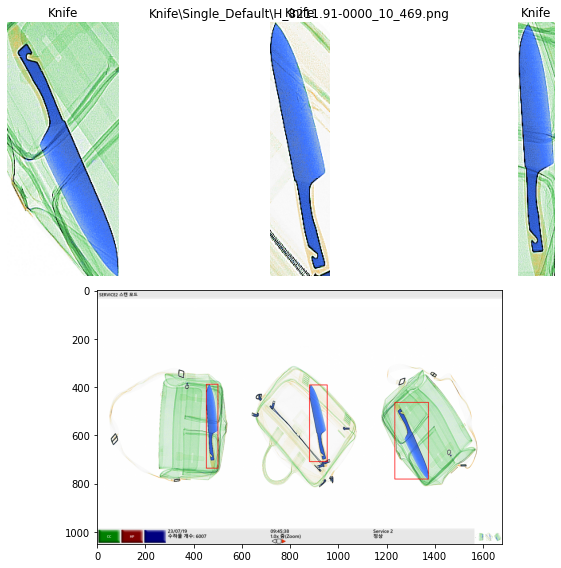

Knife\Single_Default\H_8211.91-0000_10_469.png


In [6]:
!git clone -b dev --single-branch https://github.com/swecomic/xray

######[IMPORT MODULE]#######
# coalb detect logic
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    from xray.Utils import xrayDataLoader as x_loader
    from xray.Utils.logger import log
else:
    from Utils import xrayDataLoader as x_loader
    from Utils.logger import log
    # matplotlib.use('TkAgg')
    matplotlib.use('module://backend_interagg')

import importlib
importlib.reload(x_loader)

import os
import random
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont


######[GOLBAL VLAUE]#######
# Logger
Tag = 'Train'

# parameters
train_batch_size = 32

# Training class selection
class_name = ['Knife']

# SD = Single Default / SO = Single Others / MO = Multiple Others / MC = Multiple Categories
img_type = ["SD"]
# img_type = ["SD", "SO"]

# Image Extraction Filter
# 0: get images of classes from all folders
# 1: get images of classes corresponding to the folders of specified class names
flag = "1"

def check_dir(path):
    if path == 'colab':
        train_data_dir = '/content/drive/' + 'Shared drives' + '/YS_NW/2.Data/Train/Data/'
        train_coco = '/content/drive/Shared drives/YS_NW/2.Data/Train/Meta/CoCo/coco_rapiscan.json'
    elif path == 'google_drive':
        train_data_dir = 'G:/공유 드라이브/YS_NW/2.Data/Train/Data/'
        train_coco = 'G:/공유 드라이브/YS_NW/2.Data/Train/Meta/CoCo/coco_rapiscan.json'
    else:
        train_data_dir = '/data/jiylee/dataset/xray/Train/Data/'
        train_coco = '/data/jiylee/dataset/xray/Train/Meta/CoCo/coco_rapiscan.json'

    return train_data_dir, train_coco


def get_data_loader():
    train_data_dir, train_data_coco = check_dir(LOCATION_PATH)
    _xraydataloader = x_loader.XrayDataLoader(root=train_data_dir, annotation=train_data_coco,
                                          class_name=class_name,
                                          img_type=img_type,
                                          flag=flag,
                                          batch_size=train_batch_size)
    _data_loader = _xraydataloader.get_data_loader()
    log(Tag, 'get_data_loader: loader make complete, total dataset : ' + str(len(_data_loader.dataset)))
    return _xraydataloader, _data_loader,

# show image
def check_dataset(data_set, num_of_item):
    sample = random.sample(range(0, len(data_set) - 1), num_of_item)
    for i in sample:
        plt.figure(figsize=(10,8))
        sample_img = data_set[i][0]
        sample_anno = data_set[i][1]
        bb = np.array(sample_anno["boxes"], dtype=np.float32)
        filename = np.array(sample_anno["filename"])
        class_names = np.array(sample_anno["class_names"])
        original = plt.subplot(2,1,2)
        for i in range(len(bb)):
            crop_img = sample_img.crop(bb[i])
            box_fig = plt.subplot(2, len(bb), i+1)
            box_img = np.array(crop_img)
            box_fig.imshow(box_img)
            box_fig.set_title(class_names[i])
            box_fig.axis('off')
        for i in range(len(bb)):
            draw = ImageDraw.Draw(sample_img)
            draw.rectangle(bb[i], outline='red', width =3)
        np_sample = np.array(sample_img)
        original.imshow(np_sample)
        plt.suptitle(filename)
        plt.tight_layout()
        plt.show()
        print(filename)
    return sample

if __name__ == '__main__':
    # location
    LOCATION_PATH = 'colab'
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    xray_loader, data_loader = get_data_loader()
    sample = check_dataset(data_loader.dataset, 10)
